## Reinforcement Learning - Upper Confidence Bound

#### Solving the Multi Armed Bandit Problem
In this problem we have a bunch of slot machines with a distribution which determines our win percentage when the slots are played. We don't know these distribution. We need to play these machines to find out the best distribution. This is called exploration. Once we know which machine has the best distribution, we can exploit this machine to maximize our reward. This is called exploitation. We need to find out a trade off between exploration and exploitation to maximize our reward/profit. We can use something called as the upper confidence bound algorithm to find this out.

In the below problem set we have a bunch of ads to display to the user. We have dataset with the activity of 10,000 users and 10 ads. If a user clicks on an add then the reward is 1, 0 otherwise. We will use this dataset to determine which of the ads returns the maximum reward/profit i.e which ads attracts more users.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset into variables
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
rows, columns = dataset.shape
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, (columns - 1)].values
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


We can run a simple random selection algorithm to try and see what the total reward would be if we randomly choose the ads selected and try to build a good reward

In [4]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [5]:
print("Total Reward: ", total_reward)

Total Reward:  1205


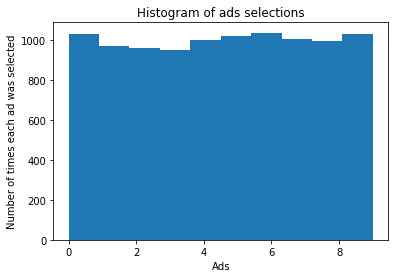

In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In the above histogram we can see that we made random selection and we were not able to maximize our profit and it looks like we almost selected all of the adds most of the time.

Next we can try to implement the Upper Confidence Bound algorithm and try to increase our maximum profit

<img src="UCB_Algorithm_Slide.PNG" style="width: 150;">

In [7]:
# Implementing UCB
import math
N = rows
d = columns
ads_selected = []
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

In [8]:
print("Total Reward: ", total_reward)

Total Reward:  2178


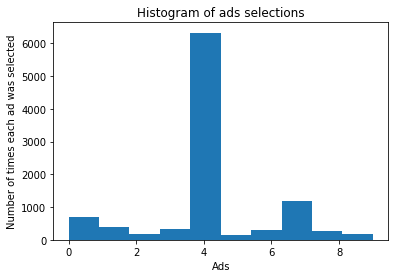

In [9]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()